# Simple Linear Regression

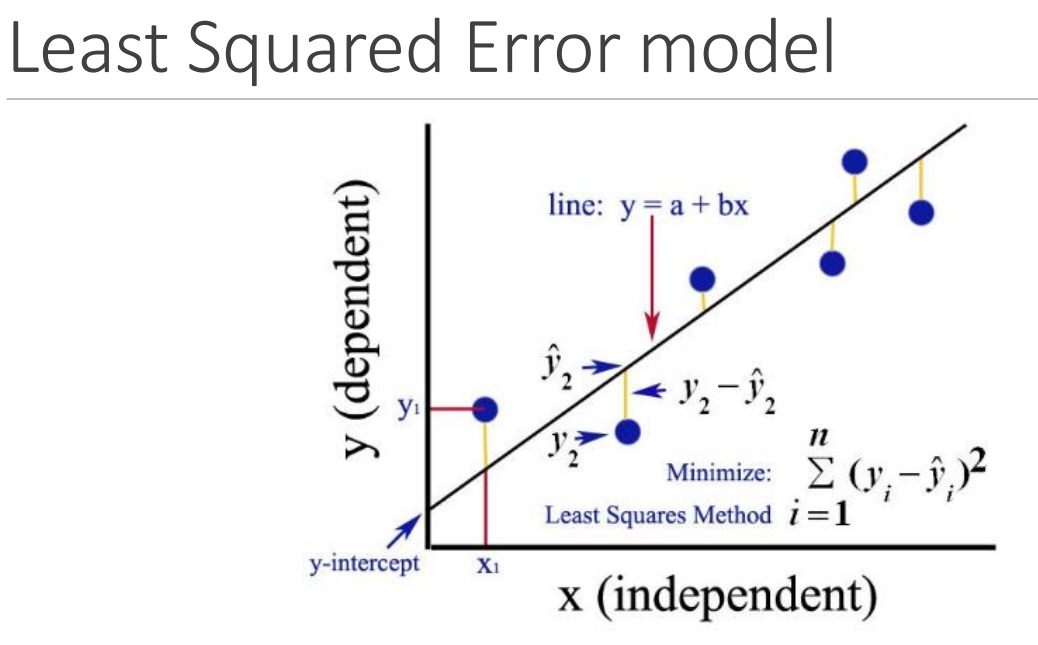

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [1]:
import pandas as pd
df=pd.read_csv("D:/ETL-Hive/Dataset/50_Startups.csv")

C:\Users\vaish\AppData\Local\Temp\ipykernel_26316\1165665291.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Profit ~ RND
### PROFIT= B0 + B1*RND
### Seperate X(RND) and Y(PROFIT)

<Axes: xlabel='RND', ylabel='PROFIT'>

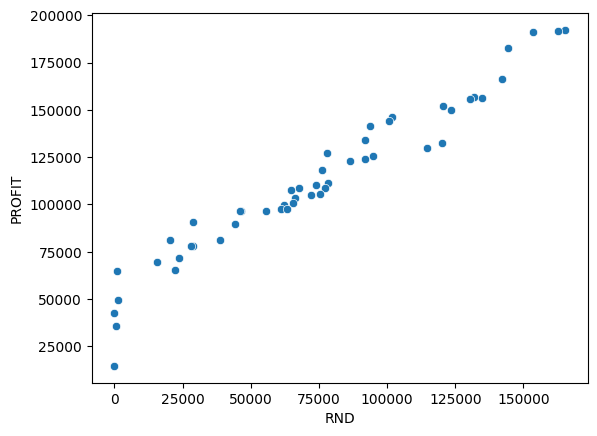

In [11]:
import seaborn as sns
sns.scatterplot(data=df, x='RND', y='PROFIT')

In [12]:
x=df[['RND']]
y=df[['PROFIT']]

### Creating Linear Regression model

In [13]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x,y)

LinearRegression()

### Get Model Intercept and coefficient 

In [15]:
# B1 Value (slope)
model.coef_

array([[0.85429137]])

In [17]:
# B0 Value (intercept) y=B0 + B1*x
model.intercept_

array([49032.89914125])

### Profit Prediction = 40932.80 + 0.8543 * RND

### Visualize Model(The Best Fit line )

<Axes: xlabel='RND', ylabel='PROFIT'>

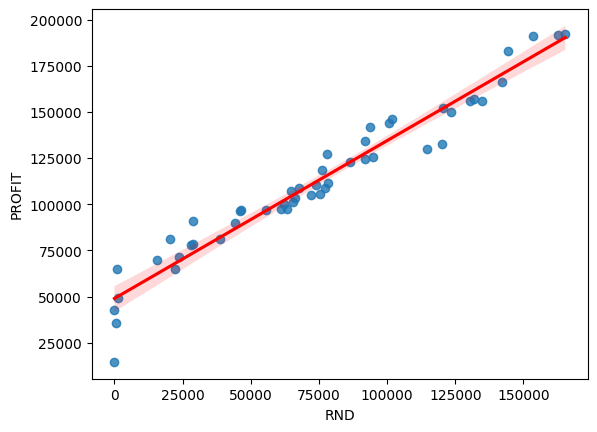

In [23]:
sns.regplot(data=df, x='RND', y='PROFIT',line_kws={'color':'red'})

### Predicting out Sample data

In [26]:
rnd =[[120000]]
proft_pred = model.predict(rnd)
proft_pred

f:\Machine_Learning\repository\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[151547.86365391]])

### Module Evaluation

1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Persentage Error (MAPE)
5. R2 Score

In [27]:
# R2 Score

model.score(x,y)

0.9465353160804393

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

ypred=model.predict(x)


In [39]:
# Mean Squared Error (MSE)
MSE=mean_squared_error(y,ypred)
MSE

85120931.32706906

In [40]:
#Root Mean Squared Error
RMSE=MSE**(1/2)
RMSE

9226.100548285232

In [41]:
#Mean Absolute Error
MAE= mean_absolute_error(y, ypred)
MAE

6910.98435457961

In [42]:
#Mean Absolute Percentage Error
MAPE = mean_absolute_percentage_error(y,ypred)
MAPE

0.11070141081984847

In [44]:
#R2_Score

R2= r2_score(y,ypred)
R2

0.9465353160804393